# Testing on three wells. 

Testing on three wells to see if it is possible to find some interference between the wells using SIDNy. 

In [1]:
# Import modules

import numpy as np
import pandas as pd
import requests
import io
import logging
from scipy.integrate import solve_ivp
from derivative import dxdt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.ndimage import median_filter

In [2]:
url = 'https://raw.githubusercontent.com/SanderSondeland/Master/main/20230118_WellBore_monthlyFacility.csv?token=GHSAT0AAAAAACD4GTTLIUBPTGRR75LLYNE4ZEJZVTA'
download = requests.get(url).content
data = pd.read_csv(io.StringIO(download.decode('utf-8')))
data

,name,npdId,field,year,month,operationTime,operationTimeUom,wellStatus,oil,oilUom,gas,gasUom,condensate,condensateUom,water,waterUom
0,33/9-C-16 A,7878,STATFJORD ØST,2016,11,25.38,d,producing,4603,Sm3,652469,Sm3,NaN,Sm3,5794,Sm3
1,33/9-C-16 A,7878,STATFJORD ØST,2016,12,NaN,d,NaN,14006,Sm3,1987611,Sm3,NaN,Sm3,28841,Sm3
2,33/9-C-16 A,7878,STATFJORD ØST,2017,1,19.98,d,producing,6172,Sm3,876347,Sm3,NaN,Sm3,14953,Sm3
3,33/9-C-16 A,7878,STATFJORD ØST,2017,2,13.06,d,producing,1546,Sm3,219285,Sm3,NaN,Sm3,9226,Sm3
4,33/9-C-16 A,7878,STATFJORD ØST,2017,3,NaN,d,NaN,2839,Sm3,402431,Sm3,NaN,Sm3,13529,Sm3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,33/9-M-4 AH,2813,STATFJORD ØST,2020,5,5.23,d,producing,1776,Sm3,483947,Sm3,NaN,Sm3,6399,Sm3
2101,33/9-M-4 AH,2813,STATFJORD ØST,2020,6,0.00,d,closed,0,Sm3,0,Sm3,NaN,Sm3,0,Sm3
2102,33/9-M-4 AH,2813,STATFJORD ØST,2020,7,0.00,d,closed,0,Sm3,0,Sm3,NaN,Sm3,0,Sm3
2103,33/9-M-4 AH,2813,STATFJORD ØST,2020,8,0.00,d,closed,0,Sm3,0,Sm3,NaN,Sm3,0,Sm3


In [3]:
data.name.unique()

array(['33/9-C-16 A', '33/9-C-33 A', '33/9-L-1 H', '33/9-L-2 H',
       '33/9-L-3 H', '33/9-L-4 H', '33/9-M-1 AH', '33/9-M-1 H',
       '33/9-M-2 AH', '33/9-M-2 BH', '33/9-M-2 H', '33/9-M-3 H',
       '33/9-M-4 AH'], dtype=object)

In [4]:
data1 = data.drop(columns=['npdId', 'field', 'operationTime', 'operationTimeUom','wellStatus','oilUom', 'gasUom', 'condensate',
'condensateUom', 'water', 'waterUom'])
data1

,name,year,month,oil,gas
0,33/9-C-16 A,2016,11,4603,652469
1,33/9-C-16 A,2016,12,14006,1987611
2,33/9-C-16 A,2017,1,6172,876347
3,33/9-C-16 A,2017,2,1546,219285
4,33/9-C-16 A,2017,3,2839,402431
...,...,...,...,...,...
2100,33/9-M-4 AH,2020,5,1776,483947
2101,33/9-M-4 AH,2020,6,0,0
2102,33/9-M-4 AH,2020,7,0,0
2103,33/9-M-4 AH,2020,8,0,0


In [5]:
x_data = data1[data1['name'] == '33/9-L-3 H']
x_data.loc[:, 'period'] = x_data['year'].astype(str) + '-' + x_data['month'].astype(str)
x_data.loc[:, 'tot_prod'] = (x_data['oil'] + x_data['gas']/1000).round(1)
x_data.groupby('period').sum()
x_data

C:\Users\sande\AppData\Local\Temp\ipykernel_2448\4116822974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data.loc[:, 'period'] = x_data['year'].astype(str) + '-' + x_data['month'].astype(str)
C:\Users\sande\AppData\Local\Temp\ipykernel_2448\4116822974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data.loc[:, 'tot_prod'] = (x_data['oil'] + x_data['gas']/1000).round(1)
C:\Users\sande\AppData\Local\Temp\ipykernel_2448\4116822974.py:4: FutureWarning: The default value of numeric_only in DataFra

,name,year,month,oil,gas,period,tot_prod
677,33/9-L-3 H,1994,10,51473,7547000,1994-10,59020.0
678,33/9-L-3 H,1994,11,90972,13310000,1994-11,104282.0
679,33/9-L-3 H,1994,12,110652,16155000,1994-12,126807.0
680,33/9-L-3 H,1995,1,99745,14158000,1995-1,113903.0
681,33/9-L-3 H,1995,2,86007,12235000,1995-2,98242.0
...,...,...,...,...,...,...,...
950,33/9-L-3 H,2019,7,0,0,2019-7,0.0
951,33/9-L-3 H,2019,8,0,0,2019-8,0.0
952,33/9-L-3 H,2019,9,0,0,2019-9,0.0
953,33/9-L-3 H,2019,10,0,0,2019-10,0.0


In [6]:
y_data = data1[data1['name'] == '33/9-L-2 H']
y_data.loc[:, 'period'] = y_data['year'].astype(str) + '-' + y_data['month'].astype(str)
y_data.loc[:, 'tot_prod'] = (y_data['oil'] + y_data['gas']/1000).round(1)
y_data.groupby('period').sum()
y_data

C:\Users\sande\AppData\Local\Temp\ipykernel_2448\2731263958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data.loc[:, 'period'] = y_data['year'].astype(str) + '-' + y_data['month'].astype(str)
C:\Users\sande\AppData\Local\Temp\ipykernel_2448\2731263958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data.loc[:, 'tot_prod'] = (y_data['oil'] + y_data['gas']/1000).round(1)
C:\Users\sande\AppData\Local\Temp\ipykernel_2448\2731263958.py:4: FutureWarning: The default value of numeric_only in DataFra

,name,year,month,oil,gas,period,tot_prod
411,33/9-L-2 H,1996,8,18896,2723000,1996-8,21619.0
412,33/9-L-2 H,1996,9,87941,12497000,1996-9,100438.0
413,33/9-L-2 H,1996,10,83026,11800000,1996-10,94826.0
414,33/9-L-2 H,1996,11,79860,11361000,1996-11,91221.0
415,33/9-L-2 H,1996,12,89757,12765000,1996-12,102522.0
...,...,...,...,...,...,...,...
672,33/9-L-2 H,2020,5,0,0,2020-5,0.0
673,33/9-L-2 H,2020,6,0,0,2020-6,0.0
674,33/9-L-2 H,2020,7,0,0,2020-7,0.0
675,33/9-L-2 H,2020,8,0,0,2020-8,0.0


In [7]:
z_data = data1[data1['name'] == '33/9-L-1 H']
z_data.loc[:, 'period'] = z_data['year'].astype(str) + '-' + z_data['month'].astype(str)
z_data.loc[:, 'tot_prod'] = (z_data['oil'] + z_data['gas']/1000).round(1)
z_data.groupby('period').sum()
z_data

C:\Users\sande\AppData\Local\Temp\ipykernel_2448\912022984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_data.loc[:, 'period'] = z_data['year'].astype(str) + '-' + z_data['month'].astype(str)
C:\Users\sande\AppData\Local\Temp\ipykernel_2448\912022984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_data.loc[:, 'tot_prod'] = (z_data['oil'] + z_data['gas']/1000).round(1)
C:\Users\sande\AppData\Local\Temp\ipykernel_2448\912022984.py:4: FutureWarning: The default value of numeric_only in DataFrameG

,name,year,month,oil,gas,period,tot_prod
181,33/9-L-1 H,1999,8,30380,4313000,1999-8,34693.0
182,33/9-L-1 H,1999,9,100684,14297000,1999-9,114981.0
183,33/9-L-1 H,1999,10,99318,14103000,1999-10,113421.0
184,33/9-L-1 H,1999,11,99453,14122000,1999-11,113575.0
185,33/9-L-1 H,1999,12,87483,12388000,1999-12,99871.0
...,...,...,...,...,...,...,...
406,33/9-L-1 H,2020,5,0,0,2020-5,0.0
407,33/9-L-1 H,2020,6,0,0,2020-6,0.0
408,33/9-L-1 H,2020,7,0,0,2020-7,0.0
409,33/9-L-1 H,2020,8,0,0,2020-8,0.0


In [8]:
import datetime
dates = [datetime.datetime(year=int(year), month=int(month), day=1) for year in range(1999, 2000) for month in range(1, 13)]
dates = dates[7:]
dates2 = [datetime.datetime(year=int(year), month=int(month), day=1) for year in range(2002, 2011) for month in range(1,13)]
dates2 = dates2[:]

In [9]:
test_x = x_data[63:-107]
tot_prod_x = test_x['tot_prod']

test_y = y_data[41:-117]
tot_prod_y = test_y['tot_prod']


test_z = z_data[5:-117]
tot_prod_z = test_z['tot_prod']

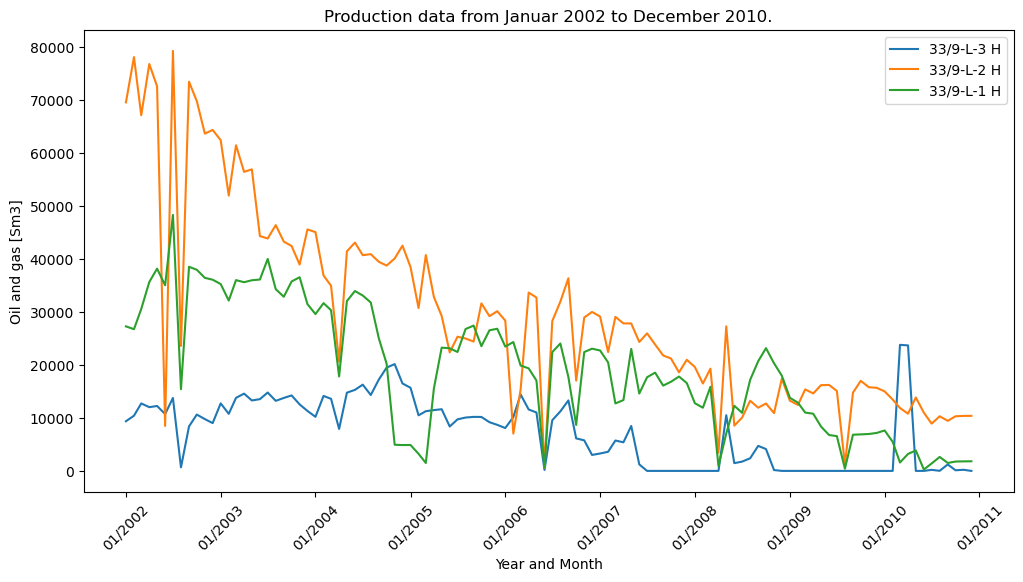

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates2, tot_prod_x, label='33/9-L-3 H')
ax.plot(dates2, tot_prod_y, label='33/9-L-2 H')
ax.plot(dates2, tot_prod_z, label='33/9-L-1 H')

date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Production data from Januar 2002 to December 2010.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

## Filtering

Filter the signals to remove the big spikes before deriving the data. Using a median filter to smooth the data.

Trying out the savgol_filter below. 

In [11]:
md_x = median_filter(tot_prod_x, size=6)

md_y = median_filter(tot_prod_y, size=6)

md_z = median_filter(tot_prod_z, size=6)

In [12]:
from scipy.signal import savgol_filter

sf_x = savgol_filter(tot_prod_x, 10, 1, mode='nearest')

sf_y = savgol_filter(tot_prod_y, 10, 1, mode='nearest')

sf_z = savgol_filter(tot_prod_z, 10, 1, mode='nearest')

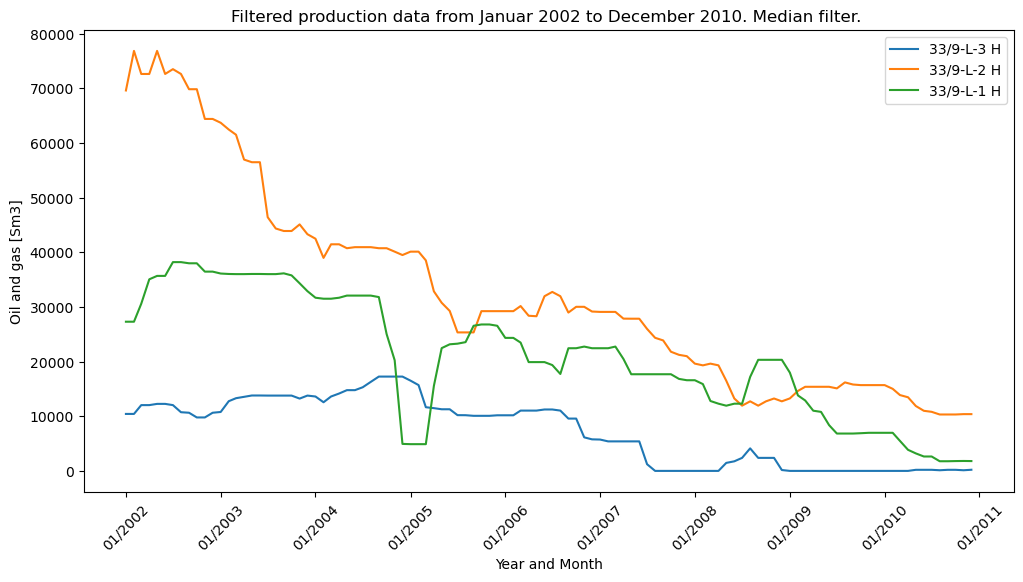

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates2, md_x, label='33/9-L-3 H')
ax.plot(dates2, md_y, label='33/9-L-2 H')
ax.plot(dates2, md_z, label='33/9-L-1 H')

date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from Januar 2002 to December 2010. Median filter. ')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

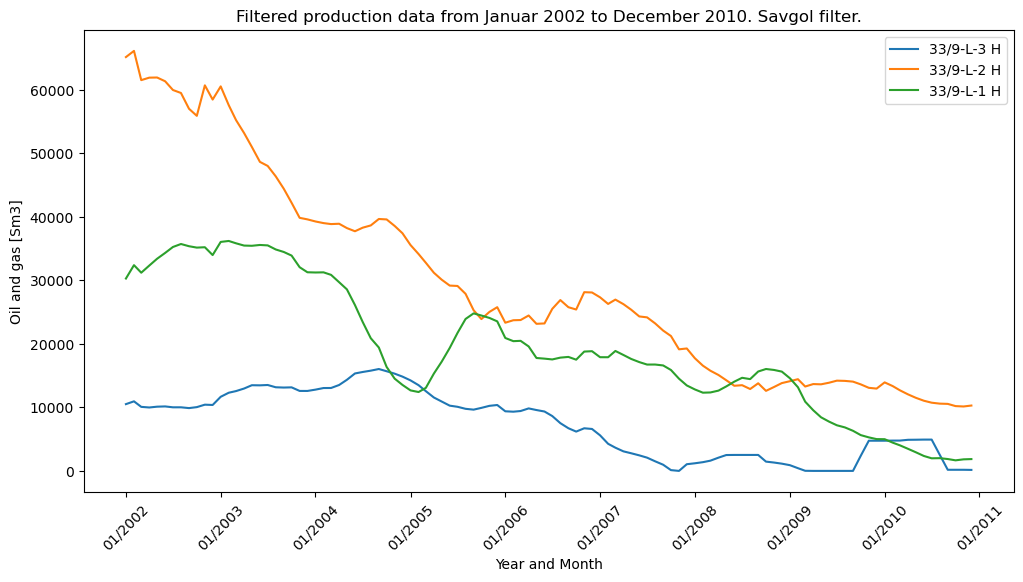

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates2, sf_x, label='33/9-L-3 H')
ax.plot(dates2, sf_y, label='33/9-L-2 H')
ax.plot(dates2, sf_z, label='33/9-L-1 H')

date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from Januar 2002 to December 2010. Savgol filter.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

In [15]:
i = len(dates2)
t = list(range(1, i+1))
t_np = np.array(t)

In [16]:
md_x_np = np.array(md_x)
md_y_np = np.array(md_y)
md_z_np = np.array(md_z)

In [17]:
x_der = dxdt(md_x_np, t_np, kind="kalman", alpha=2)
y_der = dxdt(md_y_np, t_np, kind="kalman", alpha=2)
z_der = dxdt(md_z_np, t_np, kind="kalman", alpha=2)

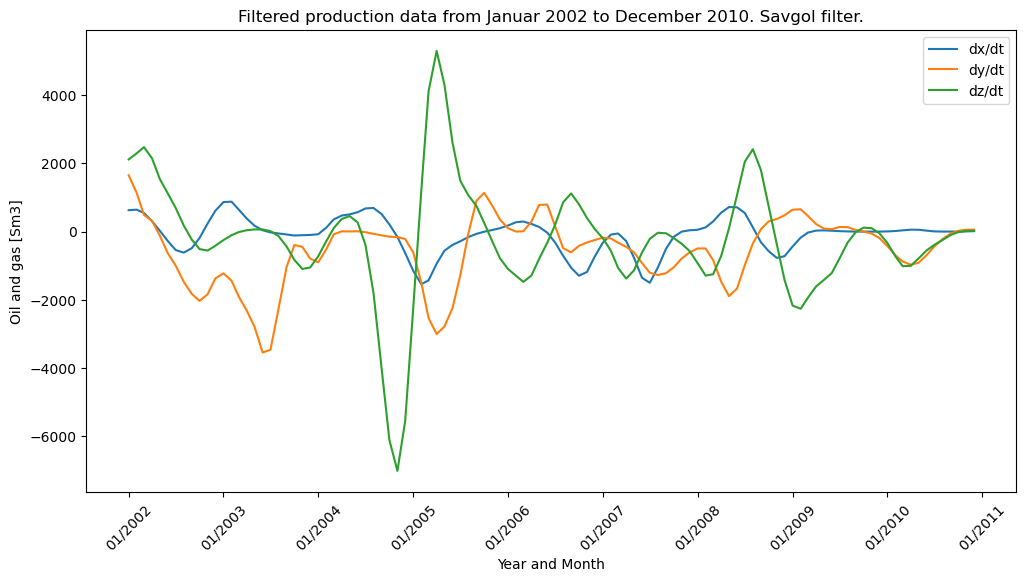

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates2, x_der, label='dx/dt')
ax.plot(dates2, y_der, label='dy/dt')
ax.plot(dates2, z_der, label='dz/dt')

date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from Januar 2002 to December 2010. Savgol filter.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

# SINDy

In [19]:
mat = np.zeros((108,3))

mat[:, 0] = md_x
mat[:, 1] = md_y
mat[:, 2] = md_z

In [20]:
mat_der = np.zeros((108,3))

mat_der[:, 0] = x_der
mat_der[:, 1] = y_der
mat_der[:, 2] = z_der

In [21]:
def create_library(u: np.ndarray, polynomial_order: int,
                   use_trig: bool, use_exp: bool) -> np.ndarray:
    """Creates a matrix containing a library of candidate functions.
    For example, if our u depends on x, y, and z, and we specify
    polynomial_order=2, use_exp=True and use_trig=False, our terms would be:
    1, x, y, z, x^2, xy, xz, y^2, yz, z^2, exp(-t*x), exp(-t*y), exp(-t*z), exp(-t*x^2), exp(-t*y^2), exp(-t*z^2)
    """
    (m, n) = u.shape
    theta = np.ones((m, 1))

    # Polynomials of order 1.
    theta = np.hstack((theta, u))

    # Polynomials of order 2.
    if polynomial_order >= 2:
        for i in range(n):
            for j in range(i, n):
                theta = np.hstack((theta, u[:, i:i + 1] * u[:, j:j + 1]))

    # Polynomials of order 3.
    if polynomial_order >= 3:
        for i in range(n):
            for j in range(i, n):
                for k in range(j, n):
                    theta = np.hstack(
                        (theta, u[:, i:i + 1] * u[:, j:j + 1] * u[:, k:k + 1]))

    # Polynomials of order 4.
    if polynomial_order >= 4:
        for i in range(n):
            for j in range(i, n):
                for k in range(j, n):
                    for l in range(k, n):
                        theta = np.hstack(
                            (theta, u[:, i:i + 1] * u[:, j:j + 1] *
                             u[:, k:k + 1] * u[:, l:l + 1]))

    # Polynomials of order 5.
    if polynomial_order >= 5:
        for i in range(n):
            for j in range(i, n):
                for k in range(j, n):
                    for l in range(k, n):
                        for m in range(l, n):
                            theta = np.hstack(
                                (theta, u[:, i:i + 1] * u[:, j:j + 1] *
                                 u[:, k:k + 1] * u[:, l:l + 1] * u[:, m:m + 1]))

    if use_trig:
        for i in range(1,2):
            theta = np.hstack((theta, np.sin(i * u), np.cos(i * u)))

    if use_exp:
        for i in range(n):
            theta = np.hstack((theta, np.exp(-u[:, i:i+1]), np.exp(-u[:, i:i+1]**2)))

    return theta

In [22]:
def approximation(_: float, u: np.ndarray, xi: np.ndarray,
                         polynomial_order: int, use_trig: bool, use_exp: bool) -> np.ndarray:
    theta = create_library(u.reshape((1, 3)), polynomial_order, use_trig, use_exp)
    return theta @ xi

def compute_trajectory(u0: np.ndarray, xi: np.ndarray, polynomial_order: int,
                       use_trig: bool, use_exp: bool) -> np.ndarray:
    t0 = 0
    dt = 1
    tmax = 108
    n = int(tmax / dt + 1)

    t = np.linspace(start=t0, stop=tmax, num=n)
    result = solve_ivp(fun=approximation,
                       t_span=(t0, tmax),
                       y0=u0,
                       t_eval=t,
                       args=(xi, polynomial_order, use_trig, use_exp))
    u = result.y.T

    return u

In [23]:
def calculate_regression(theta: np.ndarray, uprime: np.ndarray,
                         threshold: float, max_iterations: int) -> np.ndarray:
    # Solve theta * xi = uprime in the least-squares sense.
    xi = np.linalg.lstsq(theta, uprime, rcond=None)[0]
    n = xi.shape[1]

    # Add sparsity.
    for _ in range(max_iterations):
        small_indices = np.abs(xi) < threshold
        xi[small_indices] = 0
        for j in range(n):
            big_indices = np.logical_not(small_indices[:, j])
            xi[big_indices, j] = np.linalg.lstsq(theta[:, big_indices],
                                                 uprime[:, j],
                                                 rcond=None)[0]

    return xi

In [31]:
POLYNOMIAL_ORDER = 2
USE_TRIG = False
USE_EXP = False

theta = create_library(mat, POLYNOMIAL_ORDER, USE_TRIG, USE_EXP)

In [32]:
THRESHOLD = 0.01
MAX_ITERATIONS = 100

xi = calculate_regression(theta, mat_der, THRESHOLD, MAX_ITERATIONS)
xi

array([[-3.22409827e+02, -1.43103085e+02, -6.56608204e+02],
       [-1.65597332e-02,  0.00000000e+00, -7.43393900e-02],
       [ 0.00000000e+00, -1.27730347e-02,  2.99814973e-02],
       [ 1.69081543e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [33]:
mat_0 = mat[0]

u_approximation = compute_trajectory(mat_0, xi, POLYNOMIAL_ORDER, USE_TRIG, USE_EXP)
x_aprox = u_approximation[:,0]
y_aprox = u_approximation[:,1]
z_aprox = u_approximation[:,2]

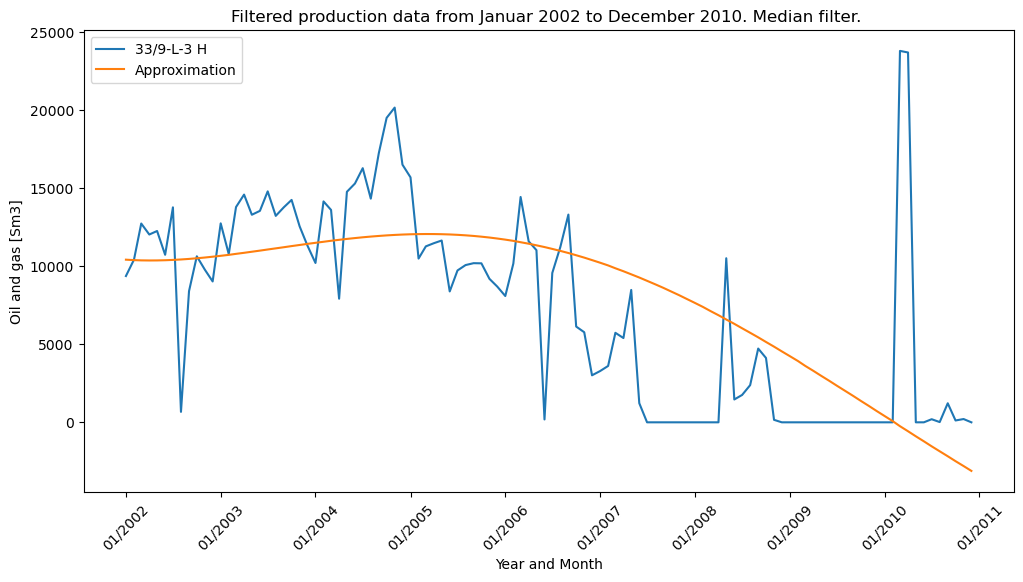

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates2, tot_prod_x, label='33/9-L-3 H')
ax.plot(dates2, x_aprox[:-1], label='Approximation')


date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from Januar 2002 to December 2010. Median filter. ')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

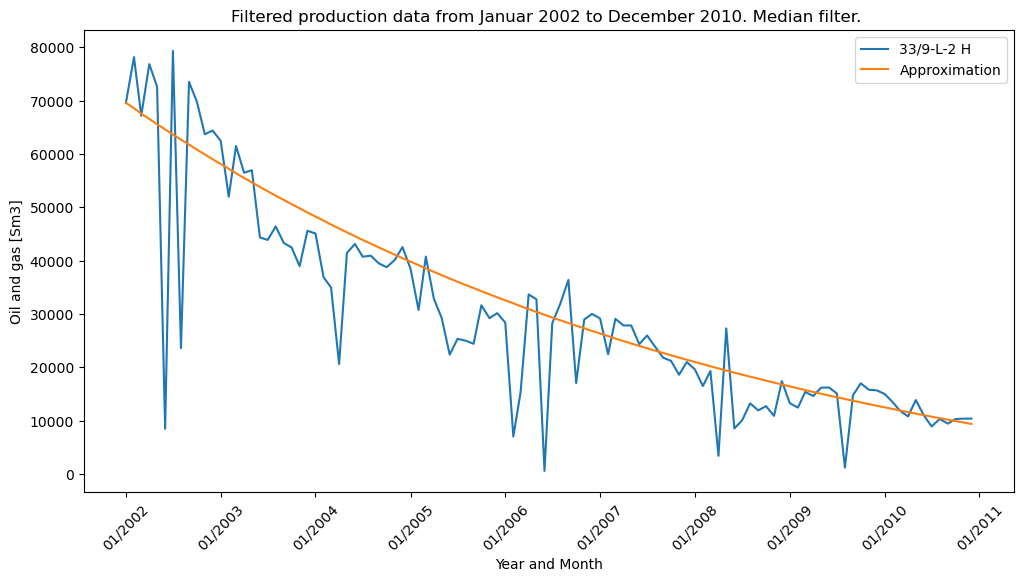

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates2, tot_prod_y, label='33/9-L-2 H')
ax.plot(dates2, y_aprox[:-1], label='Approximation')


date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from Januar 2002 to December 2010. Median filter. ')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

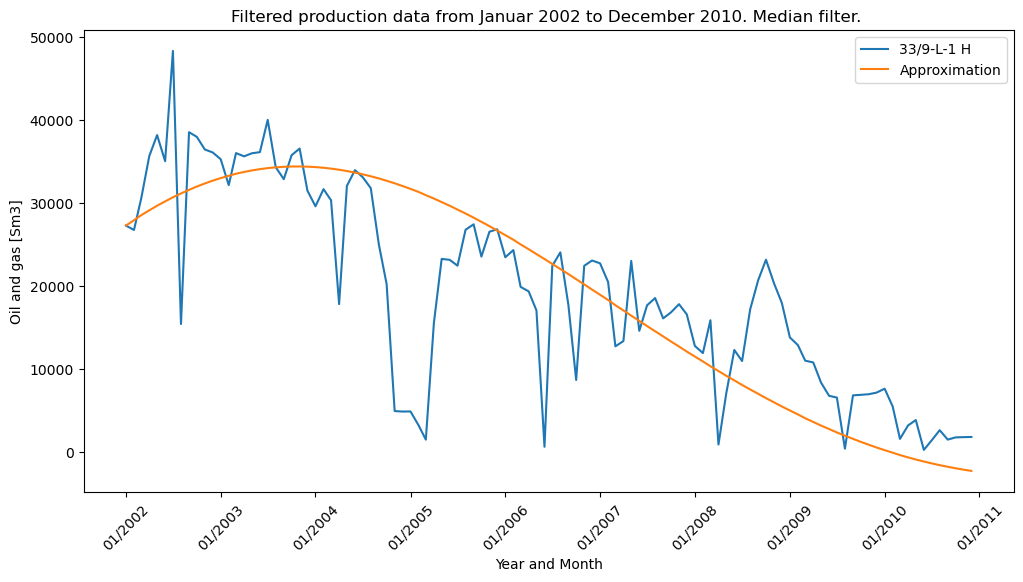

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates2, tot_prod_z, label='33/9-L-1 H')
ax.plot(dates2, z_aprox[:-1], label='Approximation')


date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from Januar 2002 to December 2010. Median filter. ')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()